In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#import libraries
import pandas as pd
import csv
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
import re
from collections import Counter
import pickle
import joblib
from sklearn.preprocessing import MultiLabelBinarizer


In [ ]:
df = pd.read_csv('/zomato.csv')

In [ ]:
#df.head()

In [ ]:
df= df.drop(columns=['url','name','phone','reviews_list', 'menu_item'])

In [ ]:
df.isna().sum()/df.shape[0] *100

,0
address,0.000000
online_order,0.000000
book_table,0.000000
rate,15.033741
votes,0.000000
location,0.040606
rest_type,0.438927
dish_liked,54.291626
cuisines,0.087012
approx_cost(for two people),0.669026


In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
# # replace string value with none
df['rate'] = df['rate'].replace('NEW', None)
df['rate'] = df['rate'].replace('-', None)

In [ ]:
# i will drop all missing data in rate becaouse it important coulmne and i dont want any bias
df = df.dropna(subset=['rate'])

In [ ]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)

In [ ]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df.isna().sum()

,0
address,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,149
dish_liked,18203
cuisines,11
approx_cost(for two people),247


In [ ]:
df = df.dropna(subset=['rest_type','cuisines'])

In [ ]:
# Filling missing 'approx_cost(for two people)' with the median value
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)

<ipython-input-31-3d6a0da6baff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median(), inplace=True)


In [ ]:
df['dish_liked'].fillna('Unknown', inplace=True)

<ipython-input-32-871b95ecb4ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dish_liked'].fillna('Unknown', inplace=True)


In [ ]:
# Delete rows where votes are less than 3
df = df[df['votes'] >= 3]

# Verify the number of rows remaining
df.shape[0]

41474

In [ ]:
# Define 'success' column: 1 if rate is above 3.75, else 0
df['success'] = df['rate'].apply(lambda x: 1 if x > 3.75 else 0)

In [ ]:
# handel the column address
df['address'].nunique()

8803

In [ ]:
df['address_'] = df['address'].apply(lambda x: ', '.join(x.strip().split(',')[1:]))

In [ ]:
df['address_']

,address_
0,"21st Main Road, 2nd Stage, Banashankari, B..."
1,"80 Feet Road, Near Big Bazaar, 6th Block, ..."
2,"Next to KIMS Medical College, 17th Cross, 2..."
3,"Annakuteera, 3rd Stage, Banashankari, Bang..."
4,"3rd Floor, Lakshmi Associates, Gandhi Bazaa..."
...,...
51709,"SAP Labs India, KIADB Export Promotion Indus..."
51711,"Next To GR Tech Park, Pattandur Agrahara, I..."
51712,"43/3, Whitefield Main Road, Whitefield, Ba..."
51715,"Prestige Shantiniketan, ITPL Main Road, Whi..."


In [ ]:
# #Since address is a categorical variable with many unique values over 8800 ,
# One-hot encoding converts each unique address into a separate binary column. However, given the large number of unique addresses,
#  this might not be practical here.
# so We can use the address_freq (address frequency) column that encodes each address based on its occurrence.
address_freq = df['address_'].value_counts().to_dict()

In [ ]:
df['address_freq'] = df['address_'].map(address_freq)

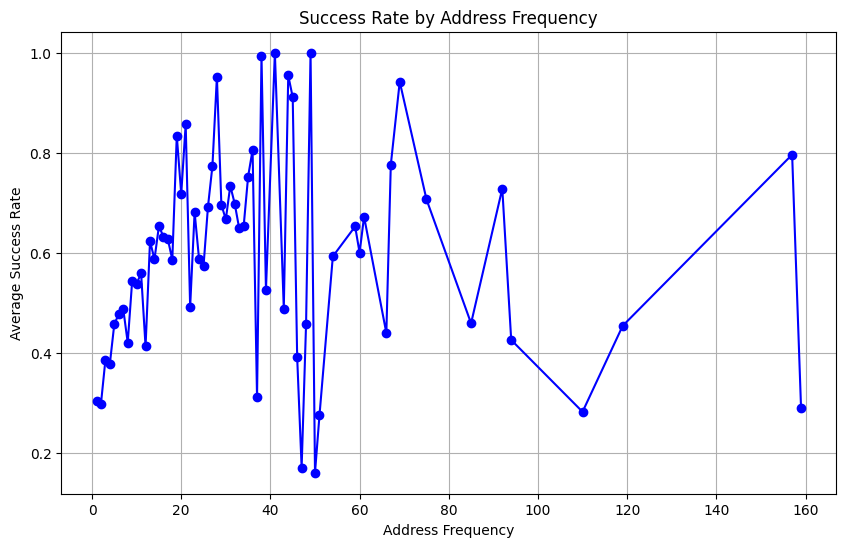

In [ ]:
# Group by address frequency and calculate the average success rate
freq_success = df.groupby('address_freq')['success'].mean()

# Plot the success rate by address frequency
plt.figure(figsize=(10, 6))
plt.plot(freq_success.index, freq_success.values, marker='o', color='b')
plt.title('Success Rate by Address Frequency')
plt.xlabel('Address Frequency')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()


In [ ]:
# Calculate the correlation between address frequency and success
correlation_address_success = df['address_freq'].corr(df['success'])
correlation_address_success

0.09956635578296438

In [ ]:
# Drop useless features
df= df.drop(columns=['address','address_','address_freq'])

In [ ]:
# Encoding some categorical variables: online_order, book_table
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [ ]:
# the unique vale not so many so we will do just encoding for this
df['location'].nunique()

92

In [ ]:
# the unique vale not so many so we will do just encoding for this
df['listed_in(type)'].nunique()

7

In [ ]:
# the unique vale not so many so we will do just encoding for this
df['listed_in(city)'].nunique()

30

In [ ]:
# Use One-Hot Encoding for the categorical columns: 'location', 'listed_in(type)', 'listed_in(city)'
encoded_columns = pd.get_dummies(df[['location', 'listed_in(type)', 'listed_in(city)']], drop_first=True)

# Merge the one-hot encoded columns back with the original dataframe
df = pd.concat([df, encoded_columns], axis=1)

# Drop the original columns as they have been encoded
df.drop(columns=['location', 'listed_in(type)', 'listed_in(city)'], inplace=True)

# Display the first few rows of the new encoded dataframe
df.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),success,location_Banashankari,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,1,True,...,False,False,False,False,False,False,False,False,False,False
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,1,True,...,False,False,False,False,False,False,False,False,False,False
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,1,True,...,False,False,False,False,False,False,False,False,False,False
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,0,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,1,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df['rest_type'].nunique())
print(df['cuisines'].nunique())
print(df['dish_liked'].nunique())

87
2369
5205


In [ ]:
# Tokenize 'rest_type', 'cuisines', and 'dish_liked' columns
df['rest_type_tokens'] = df['rest_type'].fillna('').apply(lambda x: [rest_type.strip().lower() for rest_type in x.split(',')])
df['cuisines_tokens'] = df['cuisines'].fillna('').apply(lambda x: [cuisine.strip().lower() for cuisine in x.split(',')])
df['dish_liked_tokens'] = df['dish_liked'].fillna('').apply(lambda x: [dish.strip().lower() for dish in x.split(',')])

In [ ]:
# because of the 'cuisines', and 'dish_liked' have more than 2000 features so i will pike the top 40 feature just
#  and delelt the rest
# Step 1: Flatten and count top 40 for dish_liked
all_dishes = [dish for sublist in df['dish_liked_tokens'] for dish in sublist if dish]
dish_counts = Counter(all_dishes)

# Get the top 40 most common dishes
top_40_dishes = [dish for dish, count in dish_counts.most_common(40)]
# Keep only the top 40 dishes in 'dish_liked_tokens'
df['dish_liked_tokens'] = df['dish_liked_tokens'].apply(lambda dishes: [dish for dish in dishes if dish in top_40_dishes])

# Step 2: Flatten and count top 40 for cuisines
all_cuisines = [cuisine for sublist in df['cuisines_tokens'] for cuisine in sublist if cuisine]
cuisine_counts = Counter(all_cuisines)

# Get the top 40 most common cuisines
top_40_cuisines = [cuisine for cuisine, count in cuisine_counts.most_common(40)]

# Keep only the top 40 cuisines in 'cuisines_tokens'
df['cuisines_tokens'] = df['cuisines_tokens'].apply(lambda cuisines: [cuisine for cuisine in cuisines if cuisine in top_40_cuisines])


In [ ]:
# Step 3: One-hot encode the remaining features using MultiLabelBinarizer
# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# One-hot encode 'dish_liked_tokens' and add prefix
dish_liked_encoded = pd.DataFrame(mlb.fit_transform(df['dish_liked_tokens']), columns=mlb.classes_, index=df.index)
dish_liked_encoded = dish_liked_encoded.add_prefix('dish_')

# One-hot encode 'cuisines_tokens' and add prefix
cuisines_encoded = pd.DataFrame(mlb.fit_transform(df['cuisines_tokens']), columns=mlb.classes_, index=df.index)
cuisines_encoded = cuisines_encoded.add_prefix('cuisine_')

# One-hot encode 'rest_type_tokens' and add prefix (KEEP ALL rest_types)
rest_type_encoded = pd.DataFrame(mlb.fit_transform(df['rest_type_tokens']), columns=mlb.classes_, index=df.index)
rest_type_encoded = rest_type_encoded.add_prefix('rest_type_')

In [ ]:
# Step 4: Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df, dish_liked_encoded, cuisines_encoded, rest_type_encoded], axis=1)

#  drop the original tokenized columns if no longer needed
df_encoded.drop(['dish_liked', 'cuisines', 'rest_type', 'dish_liked_tokens', 'cuisines_tokens', 'rest_type_tokens'], axis=1, inplace=True)

# Print the first few rows of the processed DataFrame to verify the result
df_encoded.head()

,online_order,book_table,rate,votes,approx_cost(for two people),success,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,rest_type_irani cafee,rest_type_kiosk,rest_type_lounge,rest_type_meat shop,rest_type_mess,rest_type_microbrewery,rest_type_pub,rest_type_quick bites,rest_type_sweet shop,rest_type_takeaway
0,1,1,4.1,775,800.0,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,True,False,False,False,...,0,0,0,0,0,0,0,1,0,0
4,0,0,3.8,166,600.0,1,False,False,False,True,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Calculate the correlation between the 'unknown' dish and the restaurant's rating
correlation_unknown_rate = df_encoded['dish_unknown'].corr(df_encoded['rate'])
correlation_unknown_rate

-0.5262538678261771

In [ ]:
correlation_unknown_success = df_encoded['dish_unknown'].corr(df_encoded['success'])
correlation_unknown_success

-0.6183273065871896

In [ ]:
# Drop the 'unknown' column from the dataset Since the "unknown" column had a strong negative correlation
# with both ratings and success,
#  removing it ensures that this negative correlation does not impact the models in an unintended way.
df_encoded.drop(columns=['dish_unknown'], inplace=True)

# Verify the column is removed
print(df_encoded.columns)

Index(['online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'success', 'location_Banashankari',
       'location_Banaswadi', 'location_Bannerghatta Road',
       'location_Basavanagudi',
       ...
       'rest_type_irani cafee', 'rest_type_kiosk', 'rest_type_lounge',
       'rest_type_meat shop', 'rest_type_mess', 'rest_type_microbrewery',
       'rest_type_pub', 'rest_type_quick bites', 'rest_type_sweet shop',
       'rest_type_takeaway'],
      dtype='object', length=235)


In [ ]:
df_encoded.dtypes[df_encoded.dtypes == 'object']

,0


In [ ]:
# is there any imbalance in target
df_encoded.success.value_counts()

,count
success,
0,21254
1,20220


In [ ]:
df_encoded.success.value_counts(normalize=True)

,proportion
success,
0,0.512466
1,0.487534


In [ ]:
df_encoded.success.mean()

0.48753435887544005

In [ ]:
df_encoded.groupby('online_order').success.mean()

,success
online_order,
0,0.429733
1,0.518261


In [ ]:
df_encoded.groupby('book_table').success.mean()

,success
book_table,
0,0.409291
1,0.924298


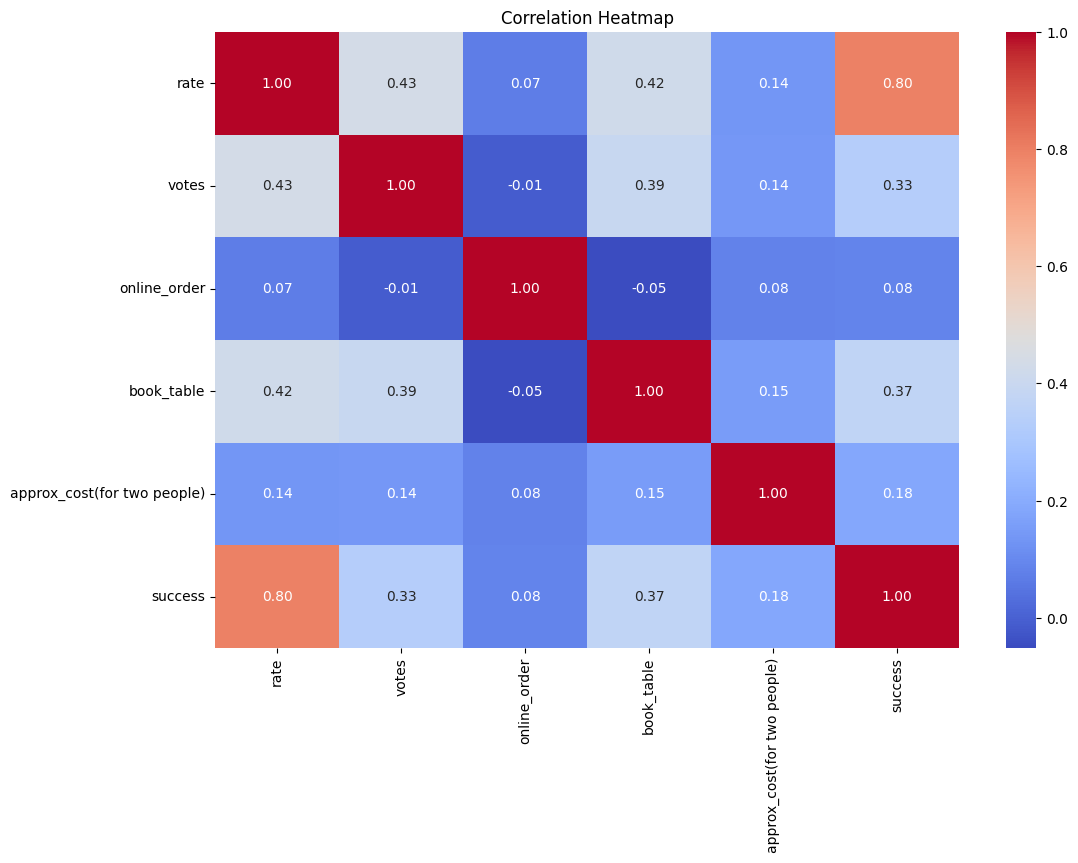

In [ ]:
# Set up the figure for plotting
plt.figure(figsize=(12, 8))

# Plotting the correlation heatmap between numerical columns to identify relationships
correlation_matrix = df_encoded[['rate', 'votes','online_order','book_table', 'approx_cost(for two people)', 'success']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculate the correlation matrix between the location columns and the 'success' column
correlation_matrix = df_encoded.corr()

# Extract the correlation between 'success' and the one-hot encoded 'location' columns
location_correlation = correlation_matrix['success'].filter(like='location_')

# Display the correlation between locations and success
print(location_correlation)

location_Banashankari         -0.003171
location_Banaswadi            -0.050752
location_Bannerghatta Road    -0.068151
location_Basavanagudi          0.001788
location_Basaveshwara Nagar   -0.007392
                                 ...   
location_West Bangalore       -0.008296
location_Whitefield           -0.034962
location_Wilson Garden        -0.028922
location_Yelahanka            -0.001923
location_Yeshwantpur          -0.027517
Name: success, Length: 91, dtype: float64


In [ ]:
# Calculate the correlation matrix between the dish_liked columns and the 'success' column
correlation_matrix = df_encoded.corr()

# Extract the correlation between 'success' and the one-hot encoded 'dish_liked' columns
dish_correlation = correlation_matrix['success'].filter(like='dish_')

# Display the correlation between locations and success
print(dish_correlation)

dish_beer                 0.156585
dish_biryani              0.081254
dish_brownie              0.112631
dish_burgers              0.195652
dish_butter chicken       0.052737
dish_chaat                0.086678
dish_chicken biryani      0.058756
dish_chicken curry        0.061446
dish_chicken grill        0.011118
dish_cocktails            0.251415
dish_coffee               0.126371
dish_dal makhani          0.072441
dish_fish                 0.136777
dish_fries                0.100178
dish_gulab jamun          0.063416
dish_hot chocolate        0.122242
dish_lassi                0.070792
dish_masala dosa          0.044835
dish_mocktails            0.210330
dish_momos                0.111835
dish_mutton biryani       0.065084
dish_nachos               0.170659
dish_noodles              0.113925
dish_paratha              0.028965
dish_pasta                0.219761
dish_pizza                0.219708
dish_rolls                0.045865
dish_roti                 0.052662
dish_salad          

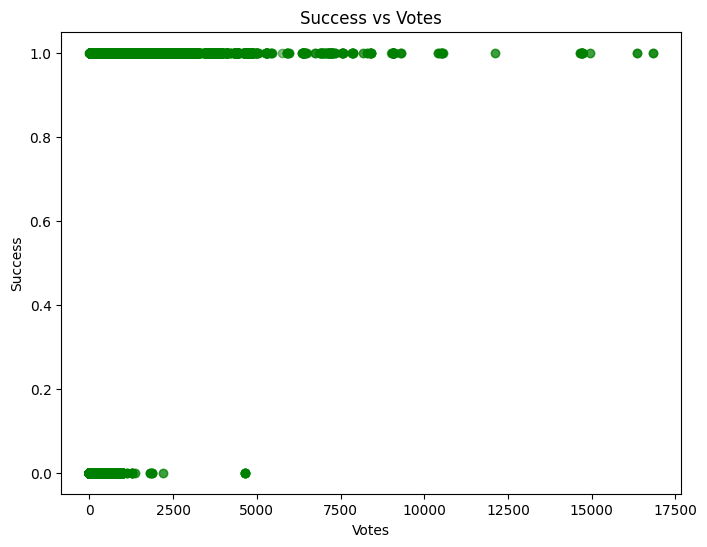

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(df_encoded['votes'], df['success'], alpha=0.5, color='green')
plt.title('Success vs Votes')
plt.xlabel('Votes')
plt.ylabel('Success')

plt.show()

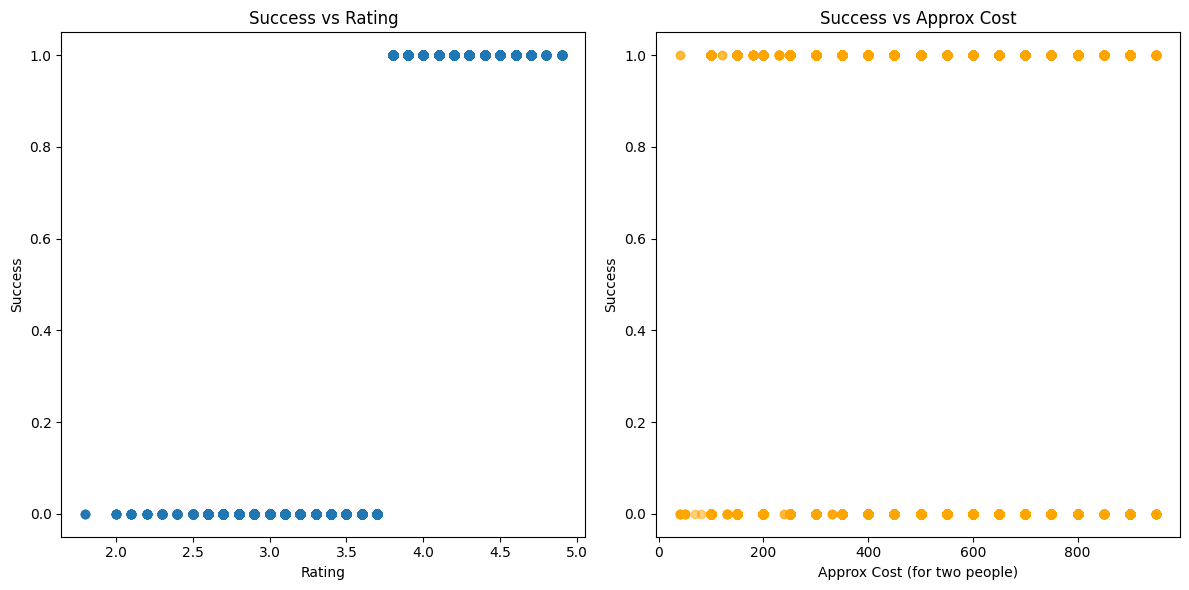

In [ ]:
# Scatter plot for Success vs Rating
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_encoded['rate'], df_encoded['success'], alpha=0.5)
plt.title('Success vs Rating')
plt.xlabel('Rating')
plt.ylabel('Success')

# Scatter plot for Success vs Approx Cost
plt.subplot(1, 2, 2)
plt.scatter(df_encoded['approx_cost(for two people)'], df_encoded['success'], alpha=0.5, color='orange')
plt.title('Success vs Approx Cost')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Success')

plt.tight_layout()
plt.show()

In [ ]:
# is There are outliers values in the price
px.box(df_encoded, x='approx_cost(for two people)')

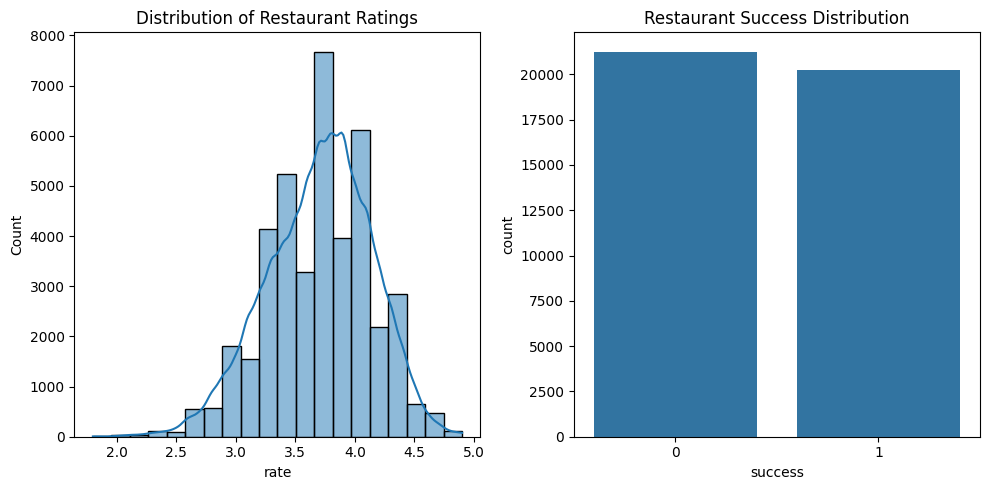

In [ ]:
# Visualizing the distribution of the 'rate' and 'success'
plt.figure(figsize=(10, 5))

# Distribution of restaurant ratings
plt.subplot(1, 2, 1)
sns.histplot(df_encoded['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')

# Success Rate Count
plt.subplot(1, 2, 2)
sns.countplot(x='success', data=df)
plt.title('Restaurant Success Distribution')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



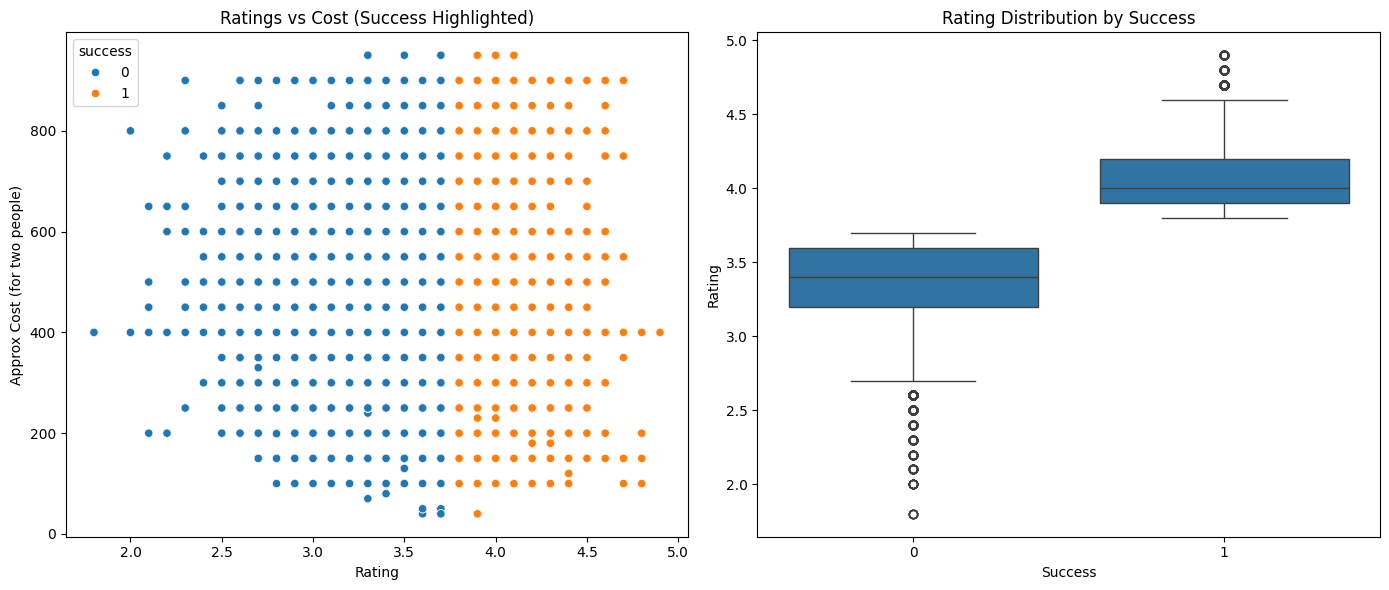

In [ ]:
# Visualizing relationship between rating, cost, and success

plt.figure(figsize=(14, 6))

# Scatter plot of rating vs approx cost colored by success
plt.subplot(1, 2, 1)
sns.scatterplot(x='rate', y='approx_cost(for two people)', hue='success', data=df_encoded)
plt.title('Ratings vs Cost (Success Highlighted)')
plt.xlabel('Rating')
plt.ylabel('Approx Cost (for two people)')

# Box plot of rating by success
plt.subplot(1, 2, 2)
sns.boxplot(x='success', y='rate', data=df_encoded)
plt.title('Rating Distribution by Success')
plt.xlabel('Success')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the distribution of ratings
rating_distribution = df_encoded['rate'].value_counts()
rating_distribution

,count
rate,
3.9,3967
3.8,3864
3.7,3812
3.6,3286
4.0,3175
4.1,2947
3.5,2768
3.4,2466
3.3,2299


In [ ]:
# Relationship between online order and success
online_order_success = pd.crosstab(df_encoded['online_order'], df_encoded['success'])
online_order_success

success,0,1
online_order,,
0,8209,6186
1,13045,14034


In [ ]:
# Relationship between table booking and success
book_table_success = pd.crosstab(df_encoded['book_table'], df_encoded['success'])
book_table_success

success,0,1
book_table,,
0,20777,14396
1,477,5824


In [ ]:
# Correlation between approximate cost and success
cost_success_corr = df_encoded[['approx_cost(for two people)', 'success']].corr()
cost_success_corr

,approx_cost(for two people),success
approx_cost(for two people),1.000000,0.184216
success,0.184216,1.000000


In [ ]:
# Check correlation between rate, votes, and success
correlation_matrix = df_encoded[['rate', 'votes', 'success']].corr()

# Display the correlation matrix
print(correlation_matrix)

             rate     votes   success
rate     1.000000  0.434561  0.797864
votes    0.434561  1.000000  0.334289
success  0.797864  0.334289  1.000000


In [ ]:
# and drop votes and rate becouse of the direct effect on success
df_encoded= df_encoded.drop(columns=['rate','votes'])

In [ ]:
# Display all column names in the DataFrame
df_encoded.columns.tolist()

['online_order',
 'book_table',
 'approx_cost(for two people)',
 'success',
 'location_Banashankari',
 'location_Banaswadi',
 'location_Bannerghatta Road',
 'location_Basavanagudi',
 'location_Basaveshwara Nagar',
 'location_Bellandur',
 'location_Bommanahalli',
 'location_Brigade Road',
 'location_Brookefield',
 'location_CV Raman Nagar',
 'location_Central Bangalore',
 'location_Church Street',
 'location_City Market',
 'location_Commercial Street',
 'location_Cunningham Road',
 'location_Domlur',
 'location_East Bangalore',
 'location_Ejipura',
 'location_Electronic City',
 'location_Frazer Town',
 'location_HBR Layout',
 'location_HSR',
 'location_Hebbal',
 'location_Hennur',
 'location_Hosur Road',
 'location_ITPL Main Road, Whitefield',
 'location_Indiranagar',
 'location_Infantry Road',
 'location_JP Nagar',
 'location_Jalahalli',
 'location_Jayanagar',
 'location_Jeevan Bhima Nagar',
 'location_KR Puram',
 'location_Kaggadasapura',
 'location_Kalyan Nagar',
 'location_Kammanaha

In [ ]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['success'])
y = df_encoded['success']

In [ ]:
# Check if there are any NaN values in y
print("Missing values in y:", y.isnull().sum())

Missing values in y: 0


In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#  Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#  Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9414932090331913
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6424
           1       0.96      0.92      0.94      6019

    accuracy                           0.94     12443
   macro avg       0.94      0.94      0.94     12443
weighted avg       0.94      0.94      0.94     12443



In [ ]:
# Creating the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validation to evaluate pipeline performance
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Train the pipeline and evaluate
pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)
classification_rep_pipeline = classification_report(y_test, y_pred_pipeline)

print(cv_scores.mean())
print(pipeline_accuracy )
print(classification_rep_pipeline)

0.9277136511095481
0.9414932090331913
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      6424
           1       0.96      0.92      0.94      6019

    accuracy                           0.94     12443
   macro avg       0.94      0.94      0.94     12443
weighted avg       0.94      0.94      0.94     12443



In [ ]:
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)